
## **The Paschen law**


The Paschen law calculates the breakdown voltage V in function of  pressure times distance(pd) product in a self-sustained small gap DC Townsend discharges



---


$V=B pd / ln(A pd/ln(1+1/\gamma))$

respectively the breakdown field 

$ (E/p) = (V/d )* (1/p)= B / ln(A pd/ln(1+1/\gamma))$

Where:

V	Breakdown voltage (V)

p	Gas pressure (Pa)

d	Electrode distance (m) 

A	Material constant (ionisations/(Pa m)

B	Material constant (V/(Pa m)

$\gamma$ 	Second Townsend coefficient






The breakdown voltage and breakdown field depend on the gas, the electrode material, the pressure and discharge gap used. 


The coefficients A and B depend on the nature of the gas used and they are only valid in some specific regions of the reduced field (E/p)(see later).


---


**Major assumptions:**  
1.	1D
2.	Electrons produced at cathode due to ion impact only. 
3.	E field constant as well as the coefficients A and B 

 	

**Deviations from the Paschen curve can originate from:**

Electron attachment

Electrode material

Electrical field distribution (inhomogeneous field)

Space charge effects 

Impurities in the gas
        
Small electrode gap

……


---


**IMPORTANT**

  The given  Paschen law is applicable only for small gap Townsend **DC** discharges.

Transition from the Townsend to Streamer-leader regime! 
If the E field due to space charge is about the applied field then transition to streamer discharge is observed (Pd>200 Torr cm =266  Pa m ; Raizer) 

Streamers occur when the product of the ionization coefficient $\alpha$, and the gap distance d, exceeds the Meek’s criterion.
Rule of thumb $\alpha$d = 18-21 for air according to Reather and Meek(ref) ).

For high frequency discharges (microwave, RF) deviation from the above DC Paschen law are observed and the DC Paschen law is stricely not applicable for RF. Calculation of breakdown voltages for high frequency discharges will be discussed in a future notebook.



---










# Paschen curve

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

particle = ["Air", "N2", "H2", "He", "Ne", "Ar", "Kr", "Xe"]
material = ["Al", "Cu", "Ni", "Pt", "C", "W", "Fe"]

 Paschen contains the coefficents A and B  for the estimation of the
      First Townsend Ionization Coefficent
      (exponential fit to the First Townsend Ionization coefficient)
      as adapted from
      E.Nasser, Fundamentals of Gaseous Ionization and Plasma Electronics,
      Wiley-Interscience, New York 1971


In [1]:
Paschen = {
    "Air": [11, 274],
    "N2": [9.0, 257],
    "H2": [3.8, 104],
    "He": [2.3, 26],
    "Ne": [3.0, 75],
    "Ar": [11, 135],
    "Kr": [13, 180],
    "Xe": [20, 263],
}
# Paschen....[A,B] A [Ionisation/(Pa m)] B [V/(Pa m)]

 gamma is the Second Townsend Ionization coefficient as given by
      A.Beroual and I. Fonfana, Discharge in Long Air Gap Modeling and Application
      IOP Publishing Ltd 2016
      ISBN 978-0-7503-1236-3 (ebook)
      ISBN 978-0-7503-1237-0 (print)

In [4]:
# Possible particles and possible electrode materials


gamma = {
    "Air": {
        "Al": 0.035,
        "Cu": 0.025,
        "Ni": 0.036,
        "Pt": 0.017,
        "C": None,
        "W": None,
        "Fe": 0.02,
    },
    "N2": {
        "Al": 0.1,
        "Cu": 0.066,
        "Ni": 0.077,
        "Pt": 0.59,
        "C": None,
        "W": None,
        "Fe": 0.059,
    },
    "H2": {
        "Al": 0.095,
        "Cu": 0.05,
        "Ni": 0.053,
        "Pt": 0.02,
        "C": 0.014,
        "W": None,
        "Fe": 0.061,
    },
    "He": {
        "Al": 0.021,
        "Cu": None,
        "Ni": 0.015,
        "Pt": 0.01,
        "C": None,
        "W": None,
        "Fe": 0.015,
    },
    "Ne": {
        "Al": 0.053,
        "Cu": 0.02,
        "Ni": 0.031,
        "Pt": 0.023,
        "C": None,
        "W": 0.045,
        "Fe": 0.022,
    },
    "Ar": {
        "Al": 0.12,
        "Cu": 0.058,
        "Ni": 0.058,
        "Pt": 0.058,
        "C": None,
        "W": None,
        "Fe": 0.058,
    },
    "Kr": {
        "Al": None,
        "Cu": None,
        "Ni": None,
        "Pt": None,
        "C": None,
        "W": None,
        "Fe": None,
    },
    "Xe": {
        "Al": None,
        "Cu": None,
        "Ni": None,
        "Pt": None,
        "C": None,
        "W": None,
        "Fe": None,
    },
}

# Function to plot Paschen curve for different gases and elctrode materials


def PaschenPlotp():
    plt.figure()
    for p in part:
        #       print(p)
        A = Paschen[p][0]
        B = Paschen[p][1]
        #       print(A,B)
        gam = gamma[p]
        #       print(gam)
        for x in mat:
            #          print(x)
            gn = gam.get(x)
            if gn is None:
                gn = 0.01  # default value= 0.01 if no gamma value (None) exists
            #              print("default")
            #            print(gn)
            g = np.log(1 + 1 / gn)
            xx = np.logspace(-0.57, 3, num=50, endpoint=True)
            plt.loglog(
                xx, B * xx / (np.log((A * xx) / g)), nonpositive="mask", label=p
            )  # Calculate and plot

    plt.xlabel("Pa m ")  # Add  x-label to the axes.
    plt.ylabel(" Breakdown voltage V")  # Add ay-label to the axes.
    plt.title("Paschen curve")  # Add a title to the axes.
    plt.legend()  # Add legend
    plt.show()


def PaschenPlotm():
    plt.figure()
    for p in part:
        #        print(p)
        A = Paschen[p][0]
        B = Paschen[p][1]
        #       print(A,B)
        gam = gamma[p]
        #        print(gam)
        for x in mat:
            #          print(x)
            gn = gam.get(x)
            if gn is None:
                gn = 0.01  # default value= 0.01 if no gamma value (None) exists
            #               print("default")
            #              print(gn)
            g = np.log(1 + (1 / gn))
            xx = np.logspace(-0.55, 3, num=50, endpoint=True)
            plt.loglog(
                xx, B * xx / (np.log((A * xx) / g)), nonpositive="mask", label=x
            )  # Calculate and plot

    plt.xlabel("Pa m ")  # Add  x-label to the axes.
    plt.ylabel(" Breakdown voltage V")  # Add ay-label to the axes.
    plt.title("Paschen curve")  # Add a title to the axes.
    plt.legend()  # Add legend
    plt.show()

**Paschen curve for different gases**

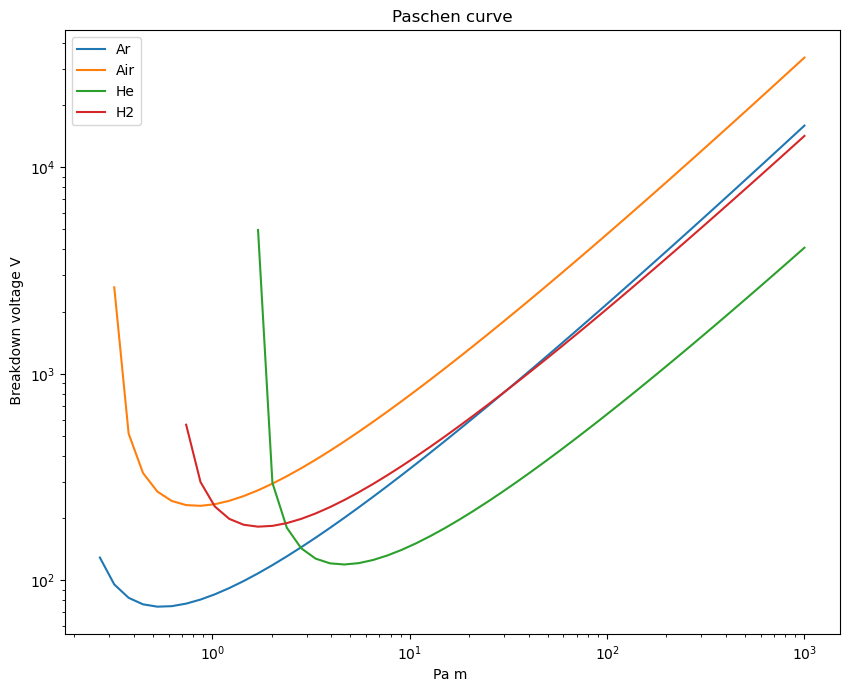

In [5]:
part = ["Ar", "Air", "He", "H2"]  # chosen particles
mat = ["Al"]  # chosen electrode materials
PaschenPlotp()

**Short discussion of the Paschen breakdown voltage** 

---



For large pd values the breakdown voltage increases almost proportional as function of pd. At elevated pressures and large distances an electron can produce many ionizing collisions even at not very high E/p. 

For low pd values the breakdown voltage increases rapidly. The ionizing collisions are very limited for small pd and E strong fields are necessary to obtain breakdown. 

A minimum breakdown voltage separates the high pressure and the low pressure breakdown regions. 

The Paschen curve has been shown to be quite accurate for large gaps at low pressures, but deviation from this curve have be observed for very low pd values. In this region considerable deviations from the original DC Paschen law are found. 
Other mechanism come into play at very low pd values (vacuum discharge, field emission....) not covered by the basic  assumption of the DC Paschen law. The deviation due to other responsable mechanisme will discussed later.  


---




**Paschen curve for different electrode materials**

The influence of the electrode material (second Townsend coefficient given in [1] ) on the breakdown voltage is shown in the next graph.


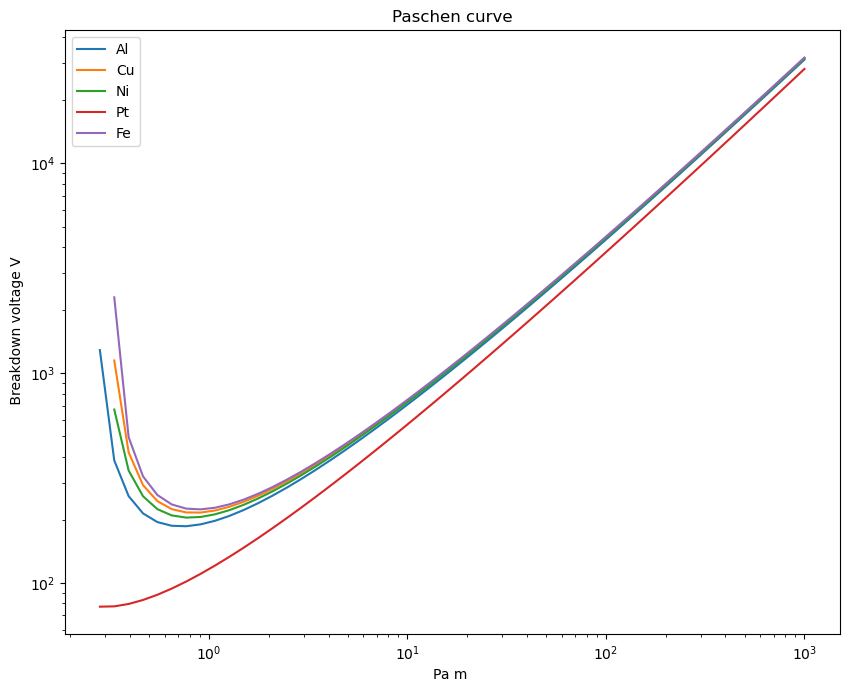

In [6]:
part = ["N2"]  # chosen particles
mat = ["Al", "Cu", "Ni", "Pt", "Fe"]  # chosen electrode materials
PaschenPlotm()

**Minimum Breakdown Voltage**

Of quite importance in various pratical applications is the minimum breakdown voltage. In many cases the Paschen law, despite of its limitations, is used to obtain an estimation of the breakdown voltage. 

The minimum breakdown voltage for the above introduced Paschen law is given by

$ (pd)min = (e/A) ln(1+(1/\gamma)$

and the minimum breakdown voltage is given by

$ U = (eB/A) ln(1+(1/\gamma)$

and the minimum breakdown field 

$ (E/p)min = B$

The minimum breakdown field is independent of the electrode material. 

In the following graph the minimum breakdown voltages for different often used gases are calculated. 

Gas Ar Minimum Breakdown voltage [V] pd min [Pa m] 96.85926603680262 0.7174760447170564
Gas Air Minimum Breakdown voltage [V] pd min [Pa m] 266.1960333736411 0.9715183699767924
Gas He Minimum Breakdown voltage [V] pd min [Pa m] 129.4943073527509 4.980550282798112
Gas H2 Minimum Breakdown voltage [V] pd min [Pa m] 212.45726265070883 2.0428582947183545


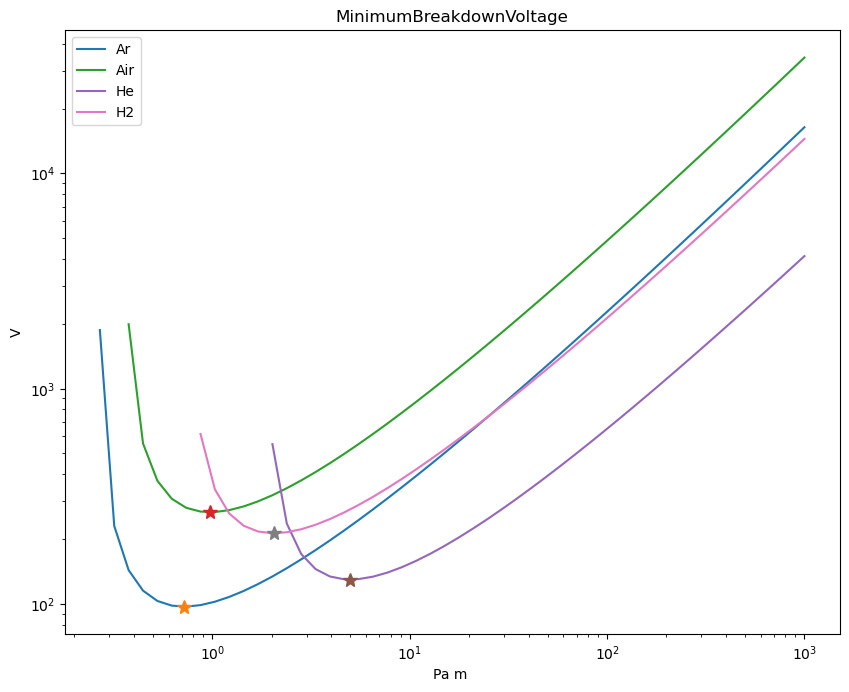

In [8]:
def MinimumBreakdownVoltage():
    # Calculates the minimum breakdown voltage (V ( Pa m))
    plt.figure()
    for p in part:
        #      print(p)
        A = Paschen[p][0]
        B = Paschen[p][1]
        #     print(A,B)
        gam = gamma[p]
        #      print(gam)
        for x in mat:
            #           print(x)
            gn = gam.get(x)
            if gn is None:
                gn = 0.01  # default value= 0.01 if no gamma value (None) exists
                print("default")
            #              print(gn)
            g = np.log(1 + 1 / gn)
            xx = np.logspace(-0.57, 3, num=50, endpoint=True)
            plt.loglog(
                xx, B * xx / (np.log((A * xx) / g)), nonpositive="mask", label=p
            )  # Calculate and plot
            Vmin = 2.718 * (B / A) * g
            pdmin = 2.718 * (g / A)
            print(
                "Gas", p, "Minimum Breakdown voltage [V]", "pd min [Pa m]", Vmin, pdmin
            )
            plt.loglog(pdmin, Vmin, marker="*", markersize=10, nonpositive="mask")
    plt.xlabel("Pa m ")  # Add  x-label to the axes.
    plt.ylabel("V")  # Add ay-label to the axes.
    plt.title("MinimumBreakdownVoltage")  # Add a title to the axes.
    plt.legend()  # Add legend
    plt.show()


part = ["Ar", "Air", "He", "H2"]  # chosen particles
mat = ["Fe"]
MinimumBreakdownVoltage()

**Application: Breakdown at atmopheric pressure in air**


In many applications approximations to the Paschen law are used.  An often used approximation is the following: 

$$U = 6.72 \sqrt{pd} + 24.36 pdA$$

p Pressure in this case 1 atm

d Electrode distance[cm]

U Breakdown voltage [kV]

Remark as a rule of thump remember 

Breakdown in air at 1 atm $U=30kV/cm$*

In the following graph the Paschen approximation and the Paschen curve for air at atmospheric pressure vs the electrode distance d are compared. 
At large distances the approximation quite well discribes the breakdown voltage. However for electrode distance below about a few thenth of micrometers considable deviation are found. 
Exeperimentaly also large deviations from the Paschen curve have been reported for electrode distances of a few tenth of micrometers. Therefore the use of the Paschen for low pd values has to be considered with  caution. 
 


**Discuss deviation of Paschen law at low pd!**

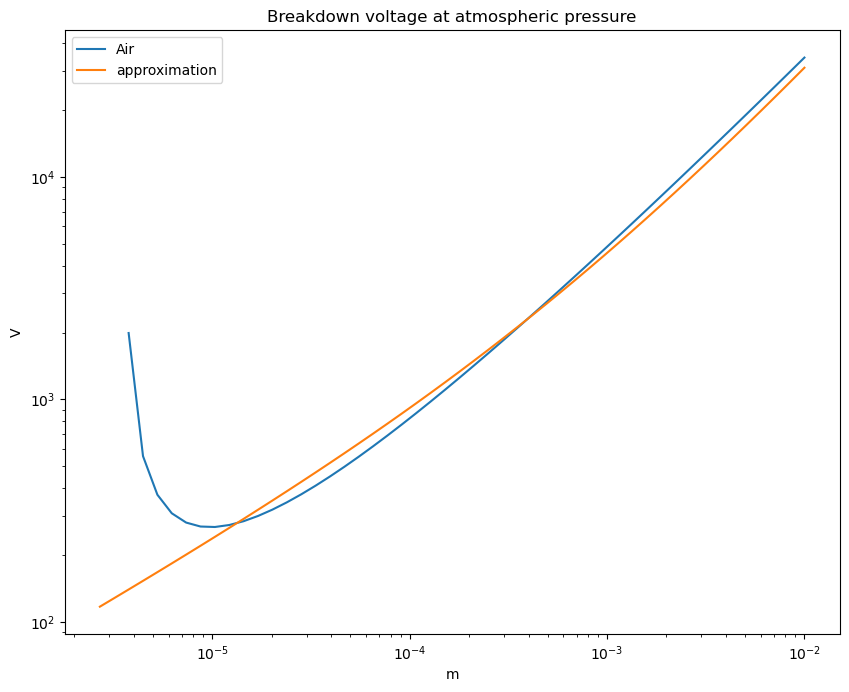

In [11]:
def BreakdownVoltageDistance():
    plt.figure()
    for p in part:
        #       print(p)
        A = Paschen[p][0]
        B = Paschen[p][1]
        #        print(A,B)
        gam = gamma[p]
        #        print(gam)
        for x in mat:
            #          print(x)
            gn = gam.get(x)
            if gn is None:
                gn = 0.01  # default value= 0.01 if no gamma value (None) exists
                print("default")
            #                print(gn)
            g = np.log(1 + 1 / gn)
            xx = np.logspace(-0.57, 3, num=50, endpoint=True)
            x2 = list(x * 1.0e-5 for x in xx)
            plt.loglog(
                x2, B * xx / (np.log((A * xx) / g)), nonpositive="mask", label=p
            )  # Calculate and plot
            #            Vmin=2.718*(B/A)*g
            #            pdmin=2.718*(g/A)
            #           print('Breakdown Voltage [V]', Vmin, 'at', pdmin, '[Pa m]')
            #           plt.loglog(pdmin,Vmin,marker='*',markersize=10, nonpositive='mask')
            #            print(xx)
            plt.loglog(
                x2,
                (6.72e3 * np.sqrt(xx * 1e-3) + 24.36e3 * xx * 1e-3),
                nonpositive="mask",
                label="approximation",
            )
    plt.xlabel("m")  # Add  x-label to the axes.
    plt.ylabel("V")  # Add ay-label to the axes.
    plt.title("Breakdown voltage at atmospheric pressure")  # Add a title to the axes.
    plt.legend()  # Add legend
    plt.show()


part = ["Air"]  # chosen particles
mat = ["Fe"]
BreakdownVoltageDistance()

**Application: Breakdown voltage vs pressure at a given distance d**

In many experiments the electrode distance is fixed and the neutral gas pressure is varied. The following graph gives the Paschen brakdown voltage vs the neutral gas pressure for a fixed distance of 1 cm and for air. 


TOOD: Add graph with slider!

Air
N2


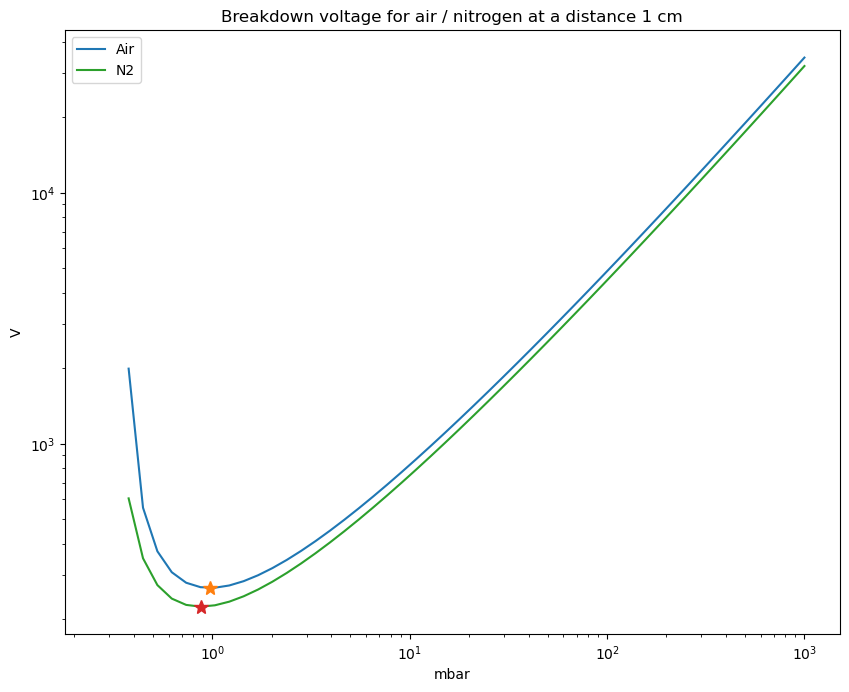

In [12]:
def BreakdownVoltagePressure():
    plt.figure()
    for p in part:
        print(p)
        A = Paschen[p][0]
        B = Paschen[p][1]
        #        print(A,B)
        gam = gamma[p]
        #        print(gam)
        for x in mat:
            #           print(x)
            gn = gam.get(x)
            if gn is None:
                gn = 0.01  # default value= 0.01 if no gamma value (None) exists
                print("default")
            #                print(gn)
            g = np.log(1 + 1 / gn)
            xx = np.logspace(-0.57, 3, num=50, endpoint=True)
            plt.loglog(
                xx, B * xx / (np.log((A * xx) / g)), nonpositive="mask", label=p
            )  # Calculate and plot
            Vmin = 2.718 * (B / A) * g
            pdmin = 2.718 * (g / A)
            #           print('Breakdown Voltage [V]', Vmin, 'at', pdmin, '[Pa m]')
            plt.loglog(pdmin, Vmin, marker="*", markersize=10, nonpositive="mask")
    plt.xlabel("mbar")  # Add  x-label to the axes.
    plt.ylabel("V")  # Add ay-label to the axes.
    plt.title(
        "Breakdown voltage for air / nitrogen at a distance 1 cm"
    )  # Add a title to the axes.
    plt.legend()  # Add legend
    plt.show()


part = ["Air", "N2"]  # chosen particles
mat = ["Fe"]
BreakdownVoltagePressure()

**Determination of the coefficients A and B**

Townsend proposed  for the First Townsend ionisation coefficient $\alpha$ the following empirical formula

$$\alpha /p = A exp (Bp /E)$$

A and B are the coefficients used in the above mentioned Paschen law and they depend on the considered gas. The  empirical relation is only valid in well-defined E/p regions as we will see later.

The reduced Townsend ionisation coefficient $\alpha/N$ can be found in various data bases or can be determined from solutions of the Boltzmann equation.
There exist in the Web several numerical solutions (Bolsig+, Bolso in Python) to the Boltzmann equation and several database exist those giving access to the Townsend ionisation coefficient $\alpha/N$ (see reference)

An example of First Townsend ionisation coefficient for argon as determined from the Bolsig Boltzmann solver and from a database given im Lxcat is shown in the following graph. 

(Please remark the quite particular units used in discharge physics such as normalisations to the neutral density N as in $\alpha/N$ or to the gas pressure p as for the reduced electric field  E/p or $\alpha/p$. The reduced electric field E/p is often given in units of Townsends (Td). (1Td = 10e-21 E/N (Vm2))

Finally the coefficients A and B can be found by a curve fit of  $\alpha /p$ vs the inverse of the reduced electrical field (1/(E/p)) as shown in the next graph.  

Therefore for other gases (and molecules)  the coefficients A and B can be determined either from Boltzmann solutions (Bolsig+) or from databases. 


The graph also shows that the Paschen approximation is fitting the reduced Townsend coefficient only in a very limited range of of (1/(E/p)) resp E/p. In many references to the coefficients A and B the validty of the approximation with respect to the E/p values is also given. 

 Make fitting? 


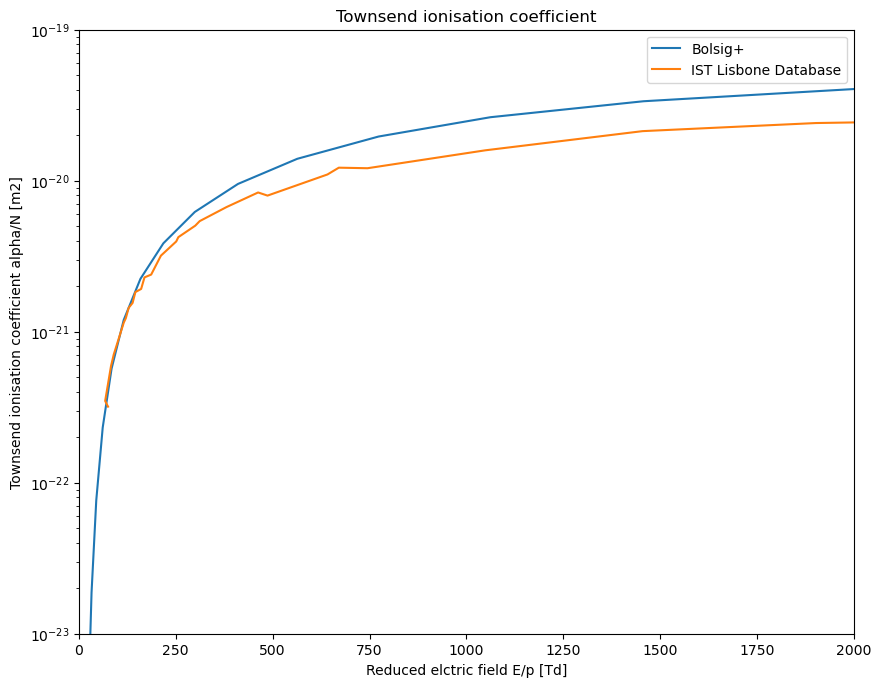

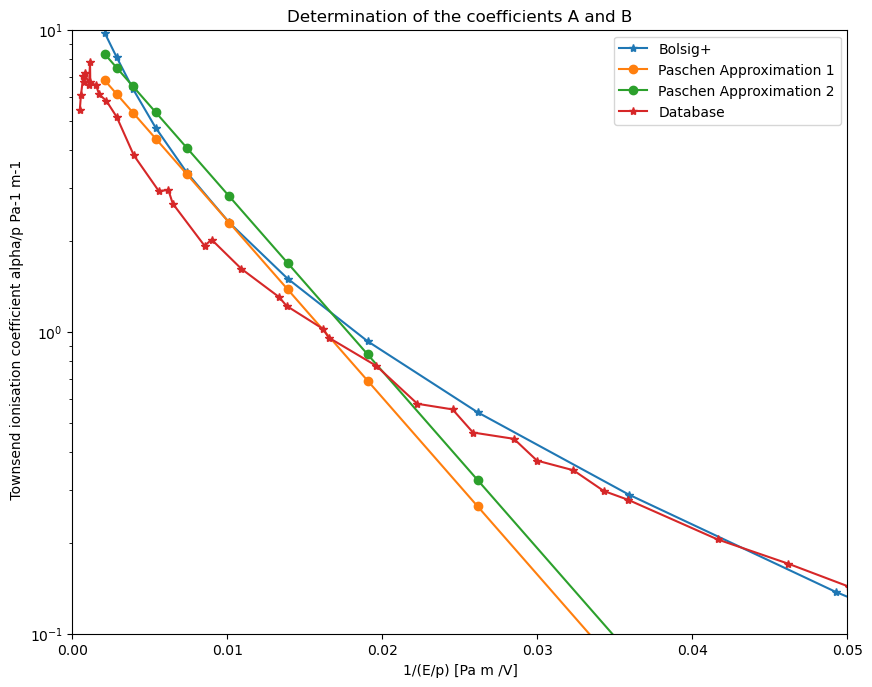

In [13]:
# Comparison ionisation coefficient from Bolsig (for Ar) and used Paschen approximation

# Bolsig+ solver ver.03/2016 www.lxcat.net #
# Biagi database, www.lxcat.net, retrieved on January 15, 2021
#
# Townsend ionisation coefficient alpha/N {m2} vs reduced electric field {Td} for Argon
alphabolsig = {
    1.0: 0.0,
    1.373: 0.0,
    1.884: 0.0,
    2.586: 0.0,
    3.550: 0.0,
    4.872: 0.1112e-23,
    6.687: 0.5584e-26,
    9.179: 0.1967 - 27,
    12.60: 0.1335e-25,
    17.29: 0.2988e-24,
    23.74: 0.3104e-23,
    32.58: 0.1874e-22,
    44.72: 0.7622e-22,
    61.38: 0.2319e-21,
    84.26: 0.5695e-21,
    115.6: 0.1196e-20,
    158.7: 0.2239e-20,
    217.9: 0.3850e-20,
    299.1: 0.6212e-20,
    410.5: 0.9523e-20,
    563.5: 0.1397e-19,
    773.4: 0.1962e-19,
    1062.0: 0.2634e-19,
    1457.0: 0.3360e-19,
    2000: 0.4047e-19,
}


# Database as an example
# IST-Lisbon database, www.lxcat.net, retrieved on January 15, 2010

# Townsend ionisation coefficient alpha/N {m2} vs reduced electric field {Td} for Argon
alphadatabase = {
    7.517727e1: 3.190000e-22,
    6.770020e1: 3.480000e-22,
    8.284268e1: 5.930000e-22,
    8.990082e1: 7.070000e-22,
    9.970235e1: 8.500000e-22,
    1.157767e2: 1.150000e-21,
    1.210711e2: 1.230000e-21,
    1.283994e2: 1.440000e-21,
    1.384517e2: 1.550000e-21,
    1.457108e2: 1.830000e-21,
    1.605681e2: 1.920000e-21,
    1.692028e2: 2.290000e-21,
    1.864555e2: 2.390000e-21,
    2.115943e2: 3.190000e-21,
    2.511031e2: 3.960000e-21,
    2.566163e2: 4.230000e-21,
    3.002819e2: 5.040000e-21,
    3.116157e2: 5.400000e-21,
    3.808278e2: 6.690000e-21,
    4.624490e2: 8.360000e-21,
    4.866954e2: 7.970000e-21,
    6.413601e2: 1.100000e-20,
    6.706890e2: 1.220000e-20,
    7.447624e2: 1.210000e-20,
    1.048851e3: 1.590000e-20,
    1.454628e3: 2.130000e-20,
    1.902250e3: 2.410000e-20,
    2.412499e3: 2.530000e-20,
    2.720331e3: 2.710000e-20,
    3.607785e3: 2.770000e-20,
    3.663521e3: 3.230000e-20,
    3.885269e3: 2.710000e-20,
    5.042057e3: 2.970000e-20,
    5.429855e3: 2.770000e-20,
    5.937817e3: 2.910000e-20,
    7.598191e3: 2.510000e-20,
    8.811933e3: 2.240000e-20,
}

ab = list(alphabolsig.keys())
bb = list(alphabolsig.values())
ad = list(alphadatabase.keys())
bd = list(alphadatabase.values())

# Plot the original input data (Bolsig and Lxcat)
plt.figure()
plt.semilogy(ab, bb, label="Bolsig+")
plt.semilogy(ad, bd, label="IST Lisbone Database")
plt.title("Townsend ionisation coefficient")
plt.xlabel("Reduced elctric field E/p [Td]")
plt.ylabel("Townsend ionisation coefficient alpha/N [m2]")
plt.xlim(0, 2000)
plt.ylim(1e-23, 1e-19)
plt.legend()
plt.show()

eb = list(1 / (0.241 * x) for x in ab)
ab = list(2.415e20 * x for x in bb)
atheo = list(9.0 * math.exp(-135 * x2) for x2 in eb)
atheo2 = list(11.0 * math.exp(-135 * x2) for x2 in eb)

ed = list(1 / (0.241 * x) for x in ad)
ad = list(2.415e20 * x for x in bd)

# Plot for coefficient determination
plt.figure()
plt.semilogy(eb, ab, marker="*", label="Bolsig+")
plt.semilogy(eb, atheo, marker="o", label="Paschen Approximation 1")
plt.semilogy(eb, atheo2, marker="o", label="Paschen Approximation 2")
plt.semilogy(ed, ad, marker="*", label="Database")

plt.xlabel("1/(E/p) [Pa m /V]")  # Add  x-label to the axes.
plt.ylabel(
    " Townsend ionisation coefficient alpha/p Pa-1 m-1"
)  # Add ay-label to the axes.
plt.title("Determination of the coefficients A and B")  # Add a title to the axes.
plt.xlim(0, 0.05)
plt.ylim(1e-1, 1e1)
plt.legend()  # Add legend
plt.show()

Add a fitting part?
Add Stoletow point?

**Further going topics**

 

*   Townsend Breakdown
*   Vacuum breakdown
*   Field emission
*   Fowler–Nordheim equation
*   Streamer
*   Boltzmann equation and its solutions
*   DC discharge simulations 


**References**

---



*  General references  

 V Lisovskiy and V Yegorenkov 
"In-depth treatment of discharge ignition data during undergraduate laboratory work" 
Eur. J. Phys. 35 (2014) 045021

 M. Radmilovic-Radjenovic1, B. Radjenovic, M. Klas, A. Bojarov and S. Matejcik
"The Breakdown Mechanisms in Electrical Discharges:
The Role of Tthe Field Emission Effect in direct
Current Discharges in Microgaps"
acta physica slovaca 63/3,105, (2013)

 V Lisovskiy and V Yegorenkov
"In-depth treatment of discharge ignition
data during undergraduate laboratory work"
Eur. J. Phys. 35 (2014) 045021 doi:10.1088/0143-0807/35/4/045021

 Yuri P. RaizerGas Discharge Physics Springer Verlag 1991


---


*A and B coefficients*



* First Townsend ionisation coefficient

  E.Nasser, Fundamentals of Gaseous Ionization and Plasma Electronics, Wiley-Interscience, New York 1971

 Bolsig+ solver ver.03/2016 www.lxcat.net 

 Biagi database, www.lxcat.net, retrieved on January 15, 2021 

 IST-Lisbon database, www.lxcat.net, retrieved on January 15, 2021

 Yuri P. Raizer Gas Discharge Physics Springer Verlag 1991



* Second Townsend coefficient

 A.Beroual and I. Fonfana, Discharge in Long Air Gap Modeling and Application       IOP Publishing Ltd 2016
\
ISBN 978-0-7503-1236-3 (ebook)

 ISBN 978-0-7503-1237-0 (print)


